In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('/Users/liu/Desktop/data_set_hackathon.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   order_date               2420 non-null   object 
 1   requested_delivery_date  2420 non-null   object 
 2   Customer Country Code    2420 non-null   object 
 3   Product Code             2420 non-null   object 
 4   Description              2420 non-null   object 
 5   order_type               2420 non-null   object 
 6   Customer Order Code      2420 non-null   int64  
 7   value                    2420 non-null   float64
 8   Curr                     2420 non-null   object 
 9   items                    2420 non-null   object 
 10  Route                    2420 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 208.1+ KB


In [4]:
df.head()

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route
0,13.07.2009,28.01.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6,RU0001
1,15.07.2009,24.03.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23,RU0001
2,16.07.2009,04.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7,RU0001
3,17.07.2009,04.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9,RU0001
4,21.07.2009,01.02.2010,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5,RU0001


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

In [6]:
df['order_date'] = pd.to_datetime(df['order_date'], format='%d.%m.%Y')
df['requested_delivery_date'] = pd.to_datetime(df['requested_delivery_date'], format='%d.%m.%Y')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_date               2420 non-null   datetime64[ns]
 1   requested_delivery_date  2420 non-null   datetime64[ns]
 2   Customer Country Code    2420 non-null   object        
 3   Product Code             2420 non-null   object        
 4   Description              2420 non-null   object        
 5   order_type               2420 non-null   object        
 6   Customer Order Code      2420 non-null   int64         
 7   value                    2420 non-null   float64       
 8   Curr                     2420 non-null   object        
 9   items                    2420 non-null   object        
 10  Route                    2420 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 208.1+ KB


## Aggregate Demand


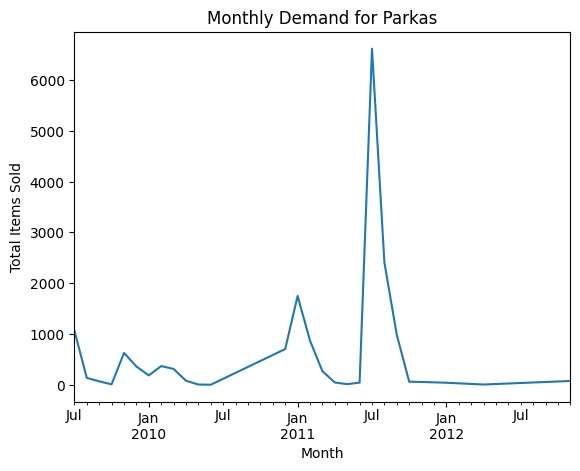

In [8]:
df['month'] = df['order_date'].dt.to_period('M')

# Convert 'items' column to numeric, handle errors='coerce' to replace non-numeric values with NaN
df['items'] = pd.to_numeric(df['items'], errors='coerce')

# Drop rows with missing values in the 'items' column
df = df.dropna(subset=['items'])

# Group by month and sum the items
monthly_demand = df.groupby('month')['items'].sum()

# Plot the monthly demand
monthly_demand.plot()
plt.title('Monthly Demand for Parkas')
plt.xlabel('Month')
plt.ylabel('Total Items Sold')
plt.show()

In [9]:
historical_orders = df.groupby(['Customer Country Code', 'month']).size()
historical_orders.head()

Customer Country Code  month  
AD                     2011-09    13
                       2011-10     1
AT                     2010-01     1
                       2010-02     1
                       2010-03    11
dtype: int64

In [10]:
# Extract year and month from the 'order_date' column
df.loc[:, 'year'] = df['order_date'].dt.year
df.loc[:, 'month'] = df['order_date'].dt.month

In [11]:
df

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route,month,year
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6.0,RU0001,7,2009
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23.0,RU0001,7,2009
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7.0,RU0001,7,2009
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9.0,RU0001,7,2009
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5.0,RU0001,7,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819196,128.52,EUR,12.0,FI0003,7,2011
2416,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819201,128.52,EUR,12.0,FI0003,7,2011
2417,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819206,128.52,EUR,12.0,FI0003,7,2011
2418,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819210,107.10,EUR,10.0,FI0003,7,2011


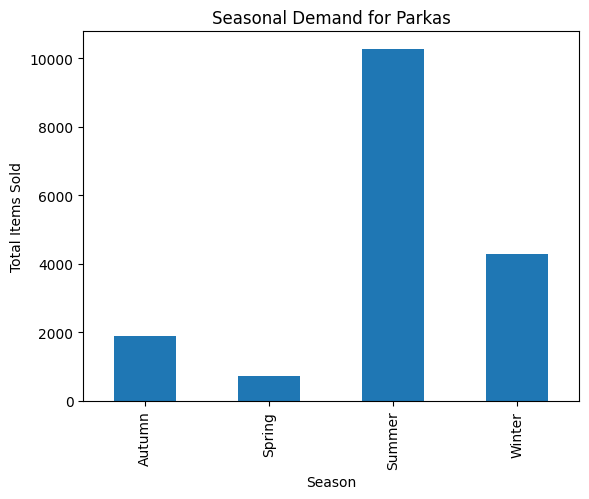

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df['order_date'] = pd.to_datetime(df['order_date'])
df['month'] = df['order_date'].dt.month

# Define a function to map months to seasons
def map_to_season(month):
    if month in [3, 4, 5]:  # Spring
        return 'Spring'
    elif month in [6, 7, 8]:  # Summer
        return 'Summer'
    elif month in [9, 10, 11]:  # Autumn
        return 'Autumn'
    else:  # Winter (December, January, February)
        return 'Winter'

# Create a new 'season' column using .loc
df.loc[:, 'season'] = df['month'].apply(map_to_season)

# Convert 'items' column to numeric, handle errors='coerce' to replace non-numeric values with NaN
df.loc[:, 'items'] = pd.to_numeric(df['items'], errors='coerce')

# Drop rows with missing values in the 'items' column
df = df.dropna(subset=['items'])

# Group by season and sum the items
seasonal_demand = df.groupby('season')['items'].sum()

# Plot the seasonal demand
seasonal_demand.plot(kind='bar')
plt.title('Seasonal Demand for Parkas')
plt.xlabel('Season')
plt.ylabel('Total Items Sold')
plt.show()


In [13]:
df

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route,month,year,season
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6.0,RU0001,7,2009,Summer
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23.0,RU0001,7,2009,Summer
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7.0,RU0001,7,2009,Summer
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9.0,RU0001,7,2009,Summer
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5.0,RU0001,7,2009,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819196,128.52,EUR,12.0,FI0003,7,2011,Summer
2416,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819201,128.52,EUR,12.0,FI0003,7,2011,Summer
2417,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819206,128.52,EUR,12.0,FI0003,7,2011,Summer
2418,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819210,107.10,EUR,10.0,FI0003,7,2011,Summer


In [14]:
df['price'] = df['value'] / df['items']
df

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route,month,year,season,price
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6.0,RU0001,7,2009,Summer,389.50
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23.0,RU0001,7,2009,Summer,441.75
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7.0,RU0001,7,2009,Summer,427.50
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9.0,RU0001,7,2009,Summer,451.25
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5.0,RU0001,7,2009,Summer,441.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819196,128.52,EUR,12.0,FI0003,7,2011,Summer,10.71
2416,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819201,128.52,EUR,12.0,FI0003,7,2011,Summer,10.71
2417,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819206,128.52,EUR,12.0,FI0003,7,2011,Summer,10.71
2418,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819210,107.10,EUR,10.0,FI0003,7,2011,Summer,10.71


In [15]:
unique_product_codes_list = df['Product Code'].unique()
print('List of Unique Product Codes:')
print(unique_product_codes_list)


List of Unique Product Codes:
['L10705000' 'L10705100' 'L10705200' 'L10705300' 'L10705400' 'L10705500'
 'L10705600' 'L10705700' 'L10850600' 'L10850700' 'L10850800' 'L10850900'
 'L10852800' 'L10852900' 'L10853100' 'L12134400' 'L12134500' 'L12134600'
 'L12134700' 'L12135800' 'L12135900' 'L12136000' 'L12136100' 'L12916800'
 'L12916900' 'L12917000' 'L12917100' 'L12917700' 'L12917800' 'L12917900'
 'L12918000' 'L12918400' 'L12918500' 'L12918600' 'L12918700' 'L12918800'
 'L12918900' 'L12919000' 'L12919100' 'L12919200']


In [16]:
codes, uniques = pd.factorize(df['Product Code'])
df['Product Code Mapped'] = codes + 1

In [17]:
df['Product Code Mapped']

0        1
1        1
2        1
3        1
4        1
        ..
2415    40
2416    40
2417    40
2418    40
2419    40
Name: Product Code Mapped, Length: 2074, dtype: int64

In [18]:
def calculate_lead_time(order_date, requested_delivery_date):
    lead_time = requested_delivery_date - order_date
    return lead_time.days

In [19]:
df['Lead Time'] = df.apply(lambda x: calculate_lead_time(x['order_date'], x['requested_delivery_date']), axis=1)
advance_demand_df = df[df['Lead Time'] > 30]
advance_demand_df

,order_date,requested_delivery_date,Customer Country Code,Product Code,Description,order_type,Customer Order Code,value,Curr,items,Route,month,year,season,price,Product Code Mapped,Lead Time
0,2009-07-13,2010-01-28,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435553,2337.00,RUB,6.0,RU0001,7,2009,Summer,389.50,1,199
1,2009-07-15,2010-03-24,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435694,10160.25,RUB,23.0,RU0001,7,2009,Summer,441.75,1,252
2,2009-07-16,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435741,2992.50,RUB,7.0,RU0001,7,2009,Summer,427.50,1,203
3,2009-07-17,2010-02-04,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435907,4061.25,RUB,9.0,RU0001,7,2009,Summer,451.25,1,202
4,2009-07-21,2010-02-01,RU,L10705000,Parka Outdoor Lifestyle STD,VO,3200435963,2208.75,RUB,5.0,RU0001,7,2009,Summer,441.75,1,195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2415,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819196,128.52,EUR,12.0,FI0003,7,2011,Summer,10.71,40,217
2416,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819201,128.52,EUR,12.0,FI0003,7,2011,Summer,10.71,40,217
2417,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819206,128.52,EUR,12.0,FI0003,7,2011,Summer,10.71,40,217
2418,2011-07-13,2012-02-15,HR,L12919200,Parka Outdoor Lifestyle STD,VO,3200819210,107.10,EUR,10.0,FI0003,7,2011,Summer,10.71,40,217


In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [21]:
# Prepare data for logistic regression
X = advance_demand_df[['price', 'season']]  # example features
y = advance_demand_df['Product Code']  # target variable

In [22]:
advance_demand_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2049 entries, 0 to 2419
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_date               2049 non-null   datetime64[ns]
 1   requested_delivery_date  2049 non-null   datetime64[ns]
 2   Customer Country Code    2049 non-null   object        
 3   Product Code             2049 non-null   object        
 4   Description              2049 non-null   object        
 5   order_type               2049 non-null   object        
 6   Customer Order Code      2049 non-null   int64         
 7   value                    2049 non-null   float64       
 8   Curr                     2049 non-null   object        
 9   items                    2049 non-null   float64       
 10  Route                    2049 non-null   object        
 11  month                    2049 non-null   int32         
 12  year                     2049 non-null 

In [23]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a column transformer with one-hot encoding for the 'season' feature
preprocessor = ColumnTransformer(
    transformers=[
        ('season', OneHotEncoder(), ['season'])
    ],
    remainder='passthrough'
)

# Create a pipeline with the preprocessor and logistic regression model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Train the logistic regression model
model.fit(X_train, y_train)

# Predict choice probabilities
predicted_probabilities = model.predict_proba(X_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
predicted_probabilities

array([[0.01231173, 0.01071314, 0.01074439, ..., 0.05413035, 0.02017612,
        0.05518065],
       [0.01784597, 0.01145365, 0.01518794, ..., 0.02789939, 0.01905324,
        0.02656279],
       [0.0122789 , 0.01070719, 0.01072146, ..., 0.05407866, 0.02014082,
        0.05515845],
       ...,
       [0.01225987, 0.01070371, 0.01070816, ..., 0.05404857, 0.02012032,
        0.05514544],
       [0.01298591, 0.0108231 , 0.01121013, ..., 0.05513328, 0.02088603,
        0.05557301],
       [0.0121    , 0.01067376, 0.01059609, ..., 0.05379223, 0.01994723,
        0.05503229]])

In [25]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, model.predict(X_test))
accuracy

0.12682926829268293

 This problem is unconstrained.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.59378D+00    |proj g|=  4.80350D-02

At iterate    5    f=  7.57406D+00    |proj g|=  4.79160D-02

At iterate   10    f=  7.57009D+00    |proj g|=  7.81215D-03

At iterate   15    f=  7.56977D+00    |proj g|=  2.28489D-04

At iterate   20    f=  7.56961D+00    |proj g|=  4.78693D-03

At iterate   25    f=  7.54680D+00    |proj g|=  8.41863D-02

At iterate   30    f=  7.40078D+00    |proj g|=  4.90157D-02

At iterate   35    f=  7.38889D+00    |proj g|=  2.37295D-03

At iterate   40    f=  7.38786D+00    |proj g|=  1.35822D-03

At iterate   45    f=  7.38764D+00    |proj g|=  3.69047D-03

At iterate   50    f=  7.38731D+00    |proj g|=  1.64270D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

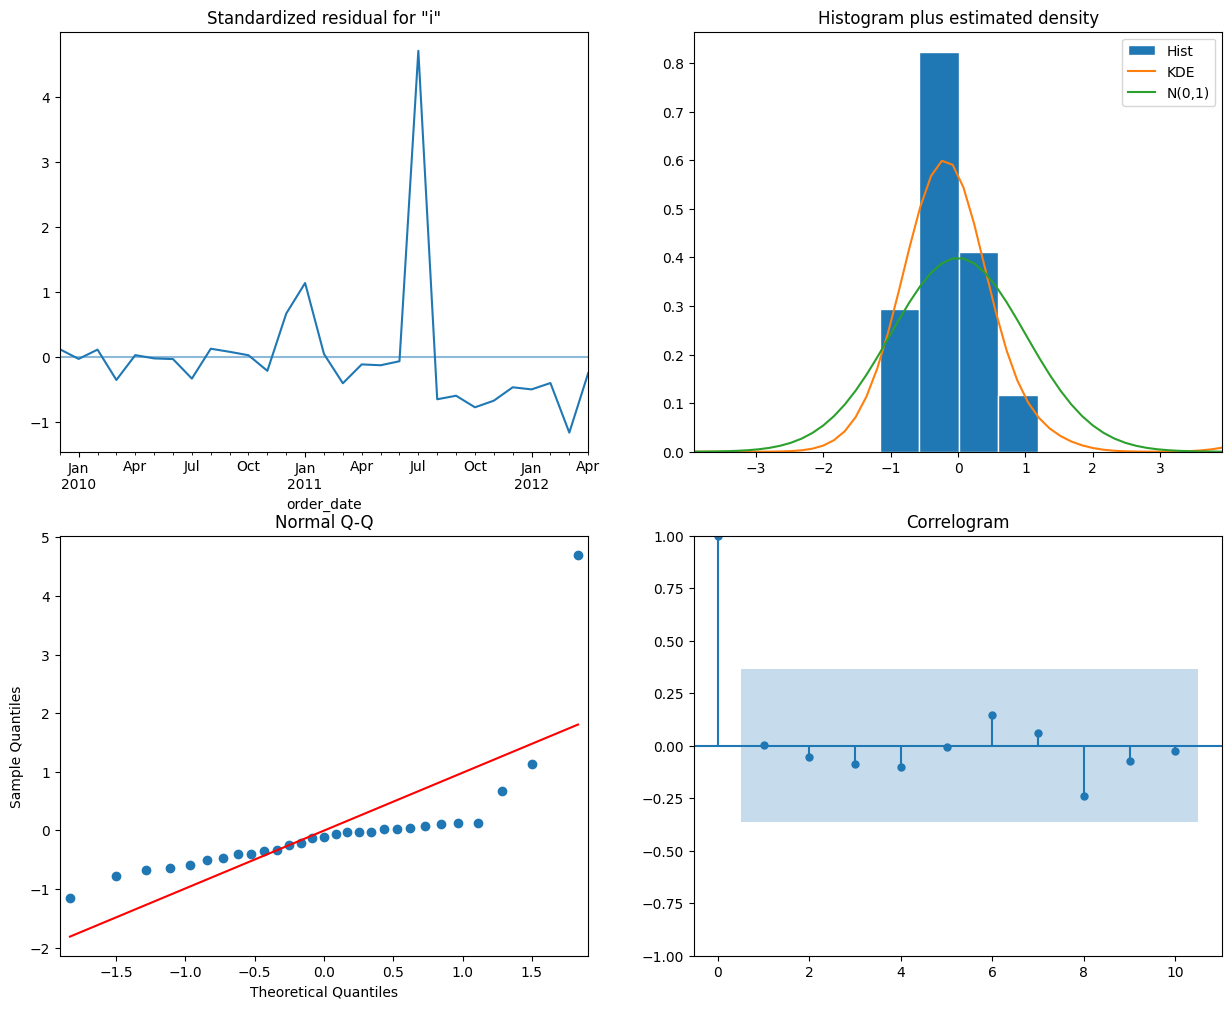

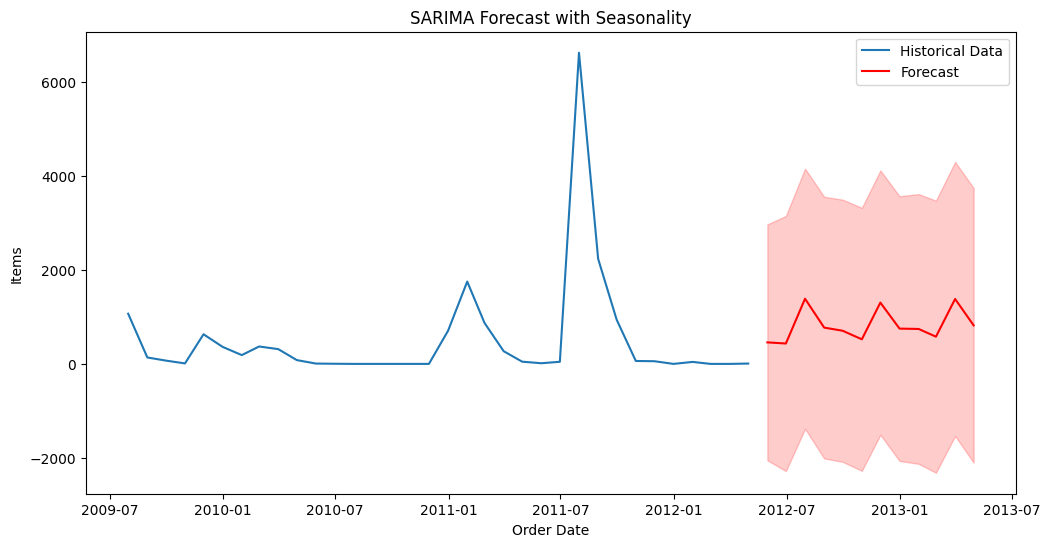

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming `advance_demand_df` is your DataFrame and you have a 'order_date' column and a 'items' column
advance_demand_df = advance_demand_df.copy()  # Make a copy to avoid SettingWithCopyWarning
advance_demand_df['order_date'] = pd.to_datetime(advance_demand_df['order_date'])
advance_demand_df = advance_demand_df.drop(['requested_delivery_date'], axis = 1)
advance_demand_df.set_index('order_date', inplace=True)

# Let's assume a monthly time series, hence 'M'
advance_demand_df = advance_demand_df.resample('M').sum()

# Define the parameters for the SARIMA model
# These should be chosen based on model diagnostics and ACF/PACF plots
p = 1  # Autoregressive term
d = 1  # Differencing
q = 1  # Moving average term
P = 1  # Seasonal autoregressive term
D = 1  # Seasonal differencing
Q = 1  # Seasonal moving average term
s = 4  # Seasonal periodicity 

# Build and fit the SARIMA model
sarima_model = SARIMAX(advance_demand_df['items'], order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_results = sarima_model.fit()

# Summarize the model results
print(sarima_results.summary())

# Perform diagnostics to check for any unusual behavior
sarima_results.plot_diagnostics(figsize=(15, 12))

# Forecast for the next period
forecast_steps = 12
forecast = sarima_results.get_forecast(steps=forecast_steps)
forecast_df = forecast.conf_int()
forecast_df['Forecast'] = sarima_results.predict(start=forecast_df.index[0], end=forecast_df.index[-1])

# Plot the forecast alongside historical data
plt.figure(figsize=(12, 6))
plt.plot(advance_demand_df.index, advance_demand_df['items'], label='Historical Data')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='red')
plt.fill_between(forecast_df.index, forecast_df.iloc[:, 0], forecast_df.iloc[:, 1], color='red', alpha=0.2)
plt.title('SARIMA Forecast with Seasonality')
plt.xlabel('Order Date')
plt.ylabel('Items')
plt.legend()
plt.show()
